# Cleaning the world happiness data

## Step1:Loading in the data



In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

pd.set_option('display.max_columns', None)


Below, we print the data column names and notice that they match the names presented in the data dictionary. 

In [3]:
happiness_orig = pd.read_excel("../data/WHR2018Chapter2OnlineData.xls", sheet_name=0)
happiness_orig.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

Print the first ten rows of data.

In [4]:
happiness_orig.head(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


Print ten random rows of data at the same time.

In [5]:
happiness_orig.sample(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
65,Austria,2006,7.122211,10.657954,0.936350,70.018700,0.941382,0.294084,0.490111,0.823105,0.173812,0.497038,1.224309,1.825915,1.760392,0.247169,0.296,0.303818,NaN
792,Liberia,2008,4.221354,6.514690,0.618693,48.764011,0.724083,0.019809,0.839668,0.585067,0.261133,0.514417,-0.735012,-1.113442,1.527572,0.361868,NaN,0.348500,NaN
52,Armenia,2016,4.325472,9.010698,0.709218,64.962730,0.610987,-0.158839,0.921421,0.593600,0.437228,0.184713,-0.609075,-0.143278,2.126364,0.491591,NaN,0.325067,0.381564
278,China,2007,4.862862,8.893610,0.810852,67.631966,NaN,-0.191909,NaN,0.817485,0.158614,NaN,-1.110035,-0.280160,1.781024,0.366250,NaN,0.425000,NaN
202,Burkina Faso,2011,4.785367,7.294864,0.709528,49.725105,0.724568,-0.091821,0.706798,0.578625,0.204736,0.632865,-0.417783,-0.366348,1.609423,0.336322,NaN,0.394667,0.454175
829,Macedonia,2014,5.203826,9.417223,0.792998,65.442474,0.644741,0.032077,0.860600,0.637328,0.306998,0.440928,0.057450,0.134971,2.371706,0.455762,0.369,0.390167,0.406790
492,Germany,2012,6.702362,10.664809,0.926407,70.595940,0.904440,0.060317,0.679237,0.803739,0.169576,0.516928,1.084680,1.656007,1.830847,0.273165,NaN,0.311571,0.405439
1303,Sri Lanka,2015,4.611607,9.311257,0.862500,64.990425,0.902075,0.311066,0.859471,0.848233,0.234751,0.739670,-0.102882,-0.092230,2.187703,0.474391,NaN,0.392250,0.369381
1040,Norway,2015,7.603434,11.067082,0.946834,71.086586,0.947621,0.230560,0.298814,0.842888,0.209410,0.586872,1.424759,1.931403,1.675640,0.220379,NaN,0.271727,0.371807
672,Ivory Coast,2016,4.542546,8.138788,0.617401,46.528927,0.768789,-0.027512,0.757453,0.703617,0.378029,0.714817,-0.593027,-0.560975,2.462604,0.542120,NaN,0.420667,0.550323


Next, we check the dimension of the data.

In [6]:
happiness_orig.shape


(1562, 19)

The above code shows that there are 1,562 rows. As a sanity check, this number should probably be divisible by the number of countries in the data. The number of countries in the data is:

In [7]:
len(happiness_orig["country"].unique())

164

But 1,562 is not divisible by 164:

In [8]:
1562/164

9.524390243902438

The fact that the number of countries cannot evenly divide the number of rows indicates that the data requires further processing.

## Step 2:Examine the data and create action items

In this section, we will look at the data itself to try to identify any invalid values, understand the missing values, and any abnormalities in the data.

### Finding invalid values



Below, we print out a summary of the values of each numeric column.


In [9]:
happiness_orig.select_dtypes('number').describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


None of the count values are negative, but the data in the `Democratic Quality` and `Delivery Quality` columns, unlike the other columns, cannot be converted into a percentage scale. The minimum and maximum values of these columns do not provide a clear indication of the upper bounds, therefore we need to explore more domain knowledge to understand the data.

According to the information provided in the attachment, the `Democratic Quality` and `Delivery Quality` indicators are derived from data based on the Worldwide Governance Indicators (WGI) project. The raw data of the WGI project includes six dimensions: Voice and Accountability, Political Stability and Absence of Violence, Government Effectiveness, Regulatory Quality, Rule of Law, and Control of Corruption. These indicators are generally scaled around an average of 0 with a standard deviation of 1.

For simplification of analysis, these six dimensions have been condensed into two composite indicators:

`Democratic Quality` is calculated by taking the simple average of `Voice and Accountability` and `Political Stability and Absence of Violence`. `Delivery Quality` is calculated by taking the simple average of the remaining four dimensions: `Government Effectiveness`, `Regulatory Quality`, `Rule of Law`, and `Control of Corruption`.

Since these indicators are derived from the original WGI indicators, and the WGI indicators themselves have the characteristic of having an average around 0 and a standard deviation around 1, the values of `Democratic Quality` and `Delivery Quality` may exceed the conventional 0-1 percentage range and instead exhibit a broader distribution.

Additionally, we observed that the distribution of years is not evenly distributed across the dataset based on its quantiles. To better understand the spread of years in the dataset, we constructed a histogram of the `year` variable:

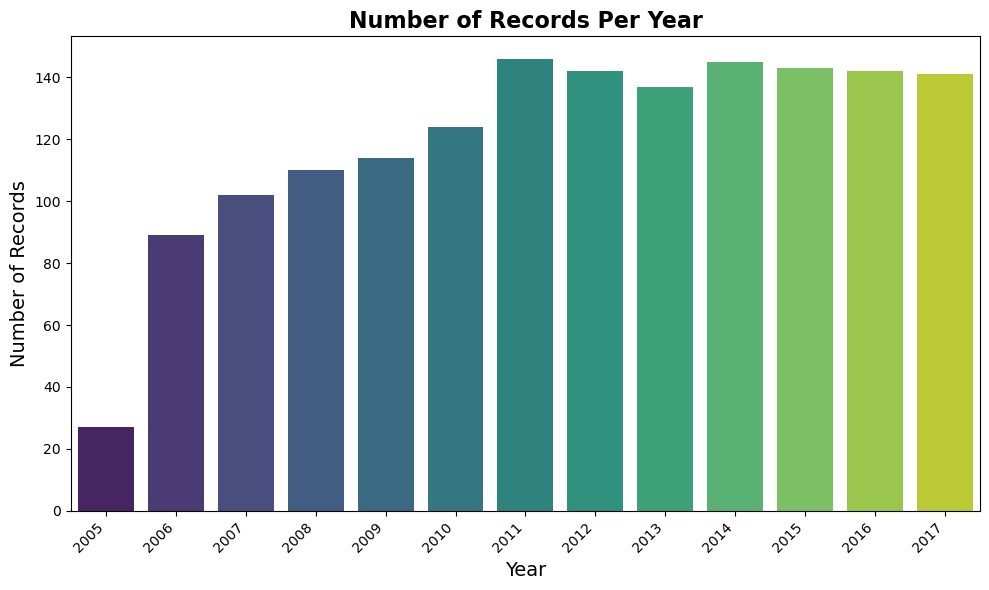

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of the frequency of years; add titles and labels
plt.figure(figsize=(10, 6))
sns.countplot(data=happiness_orig, x='year', palette="viridis")

# add titles and labels
plt.title("Number of Records Per Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Records", fontsize=14)

# set the x-axis to represent years, and rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# display the plot
plt.tight_layout()  # adjust the layout
plt.show()


It is noted that the number of countries in our dataset is 164. For data consistency, we can remove years with a frequency of fewer than 100 during the data cleaning process.

**Data cleaning action item: Add an option to remove the pre-2007 data**
>
> We want to have an option in our cleaning function to remove the pre-2007 data, but the default option will be to keep it.

By following these steps, we can ensure the dataset is cleaned and ready for further analysis:

In [11]:
# delete rows with years 2005 or 2006
happiness_clean = happiness_orig
happiness_clean = happiness_clean[~happiness_clean['year'].isin([2005, 2006])]

View the cleaned years:

In [12]:
happiness_clean['year'].unique() # Confirm that the years 2005 and 2006 have been deleted


array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007],
      dtype=int64)

Check the number of rows and columns after cleaning:

In [13]:
happiness_clean.shape

(1446, 19)

### Examining missing values

From our tables above, it doesn't look like there are any extreme values (such as `999`) that are hiding missing values.

The output below shows the number and proportion of missing rows in each column, arranged in order of least to most missingness.



In [14]:
missing_prop = happiness_orig.isna().sum() / len(happiness_orig.index)
missing_prop.sort_values()

country                                                     0.000000
year                                                        0.000000
Life Ladder                                                 0.000000
Standard deviation/Mean of ladder by country-year           0.000000
Standard deviation of ladder by country-year                0.000000
Healthy life expectancy at birth                            0.005762
Negative affect                                             0.007682
Social support                                              0.008323
Positive affect                                             0.011524
Log GDP per capita                                          0.017286
Freedom to make life choices                                0.018566
Generosity                                                  0.051216
Perceptions of corruption                                   0.057618
Confidence in national government                           0.103073
Democratic Quality                

The `GINI index (World Bank estimate)`has more than 60% of its data missing. What is the relationship between this missing data and time? The following image shows the proportion of missing values for each year:

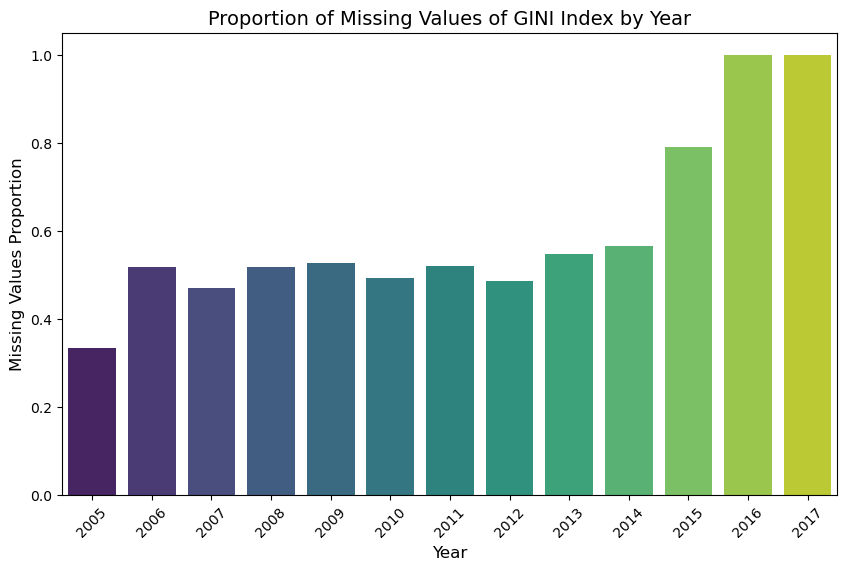

In [15]:
import seaborn as sns

# Calculate the number of missing values for the GINI index (World Bank estimate) column for each year
missing_values_by_year = happiness_orig[happiness_orig['GINI index (World Bank estimate)'].isnull()].groupby('year').size()

# Calculate the total number of rows for each year
total_values_by_year = happiness_orig.groupby('year').size()

# Calculate the proportion of missing values for each year
missing_values_proportion_by_year = missing_values_by_year / total_values_by_year

# Plot the chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_proportion_by_year.index, y=missing_values_proportion_by_year.values, palette="viridis")

# Set the chart title and labels.
plt.title('Proportion of Missing Values of GINI Index by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Missing Values Proportion', fontsize=12)

# Display the chart.
plt.xticks(rotation=45)
plt.show()


It can be observed that the proportion of missing data increases in later years.

How is the distribution of missing data across countries? Are there certain countries where data is missing only for specific years, or is all the data missing, or completely without any missing data?

The table below presents the count of non-missing values for the `GINI index (World Bank estimate)` in 20 randomly selected countries. The pattern of missing data varies greatly across different countries! Some countries report no non-missing data at all, while others report data for the years 1, 2, 3, 6, and 7.

In [16]:
# identify whether each GINI index (World Bank estimate) value is not missing
# and group by country (index)
# and add up the number of non-missing values
non_missing_by_country = happiness_orig.set_index("country")["GINI index (World Bank estimate)"] \
    .notna() \
    .groupby(level=0) \
    .sum() 

# sample 20 random countries (with a seed)
# and arrange countries alphabetically
non_missing_by_country.sample(20, random_state=1303) \
    .sort_index()

country
Bulgaria         6
Colombia         8
Croatia          6
Ecuador         10
El Salvador     10
Guatemala        3
India            1
Jordan           2
Kazakhstan      10
Liberia          2
Montenegro       7
Namibia          0
Sierra Leone     1
Slovakia         6
Sudan            1
Swaziland        0
Syria            0
Togo             3
Tunisia          1
Uganda           2
Name: GINI index (World Bank estimate), dtype: int64

Let's visualize the distribution of non-missing data by country in the figure below

In [17]:
px.histogram(non_missing_by_country, 
             nbins=19, 
             labels={"value": "Number of non-missing GINI index (World Bank estimate) values per country"})

It appears that nearly 50 countries report no data at all (the first, leftmost bar), while fewer than 20 countries report data for 10 years (the last, rightmost bar).

Based on the previous data analysis, we know there are a total of 13 years of data, but after counting the reported data for each country, we find that no country reports data for more than 10 years. In other words, there is no country that has reported data for every year, which is quite disappointing...

Out of curiosity, let's take a look at the countries that have data for 10 years, as well as some countries that only report data for certain years.

The table below shows the count of non-missing data for the `GINI index (World Bank estimate)` in Ecuador (which has data for 10 years).

In [18]:
# filter to just Ecuador
happiness_Ecuador = happiness_orig.query('country == "Ecuador"')
# print out just the country, year, and GINI index (World Bank estimate) columns
happiness_Ecuador[["country", "year", "GINI index (World Bank estimate)"]]

,country,year,GINI index (World Bank estimate)
392,Ecuador,2006,0.532
393,Ecuador,2007,0.543
394,Ecuador,2008,0.506
395,Ecuador,2009,0.493
396,Ecuador,2010,0.493
397,Ecuador,2011,0.462
398,Ecuador,2012,0.466
399,Ecuador,2013,0.473
400,Ecuador,2014,0.454
401,Ecuador,2015,0.465


The table below shows the count of non-missing values for the `GINI index (World Bank estimate)` in Togo, which has data for 3 years.

In [19]:
# filter to just Togo
happiness_Togo = happiness_orig.query('country == "Togo"')
# print out just the country, year, and GINI index (World Bank estimate) columns
happiness_Togo[["country", "year", "GINI index (World Bank estimate)"]]

,country,year,GINI index (World Bank estimate)
1384,Togo,2006,0.422
1385,Togo,2008,NaN
1386,Togo,2011,0.460
1387,Togo,2014,NaN
1388,Togo,2015,0.430
1389,Togo,2016,NaN
1390,Togo,2017,NaN


The type of missing data is highly significant and can guide us in deciding how to impute these values. For instance, if missing data is limited to certain years, imputing these values may affect the outcome of our analysis. However, in some cases, imputation may not be necessary, making it an optional preprocessing step.

Some reasonable methods for handling missing data include:

- Using the average of adjacent non-missing values to impute the missing data.

- Using the closest non-missing value from the same country to fill in the missing data. If the missing value falls between two non-missing years, we may randomly choose one of them.

- Using the previous non-missing value from the same country for imputation.

- Using interpolation methods to estimate missing values based on the trend of non-missing data for that country.

For countries where all data is missing, we will impute the `GINI index (World Bank estimate)` as 0. We assume that these countries were not included in the World Bank's data, although this assumption may not be entirely accurate. Since these data are not publicly available, no further actions can be taken.


> **Pre-processing action item: Impute the donor count variable**
> 
> There are several judgment call options that seem reasonable for creating imputed donor count variables, including:
> 
> - The *average* of the two surrounding non-missing values from the country.
>
> - The *previous* non-missing value from the country.
>
> For the countries that do not report *any* donor counts (i.e., all their data is missing), we will impute their donor counts with 0. 


Other options include imputing using the *closest* (in terms of year) non-missing value from the country and using an *interpolated* value that takes into account the trend from all of the non-missing values from the country, but these are much trickier to code so we exclude them here. 



#### Imputation function

Below, we define a function, `impute_feature()`, that we will later call inside our data cleaning/pre-processing function to impute the missing values, with arguments for each imputation judgment call option. 


In [20]:
def impute_feature(data, feature, group, impute_method):
    # impute_method = impute_method.lower()
    
    if impute_method == "previous":
        data = (data.assign(feature_imputed=data[feature]) # create a new variable called feature_imputed that is equal to feature
                    .groupby(group) # group by 
                    .fillna(method='ffill') # impute using forward fill
                    .fillna(0)) # impute remaining missing values with 0
        return data["feature_imputed"]
    elif impute_method == "average":
        # create two temporary variables each equal to feature
        data = data.assign(imputed_feature_tmp_prev=data[feature], imputed_feature_tmp_next=data[feature])
        # fill the first variable using forward fill
        data["imputed_feature_tmp_prev"] = data.groupby(group)["imputed_feature_tmp_prev"].fillna(method='ffill')
        # fill the second variable using backward fill
        data["imputed_feature_tmp_next"] = data.groupby(group)["imputed_feature_tmp_next"].fillna(method='bfill')
        # then define feature_imputed column to be the mean of the forward and backward filled values
        data['feature_imputed'] = data[['imputed_feature_tmp_next', 'imputed_feature_tmp_prev']].mean(axis=1, skipna=True)
        # impute any remaining missing values with 0
        data['feature_imputed'].fillna(0, inplace=True)
        # remove the two temporary variables
        data = data.drop(columns=['imputed_feature_tmp_prev', 'imputed_feature_tmp_next'])
        return data["feature_imputed"]
    else:
        raise ValueError

We can compare the first 20 original and imputed GINI index (World Bank estimate) using:



In [21]:
happiness_orig["imputed_Gini"] = impute_feature(happiness_orig, 
                                                   feature = "GINI index (World Bank estimate)", 
                                                   group = "country", 
                                                   impute_method = "average")
happiness_orig[["country", "year", "GINI index (World Bank estimate)", "imputed_Gini"]].sample(20, random_state=1010)

,country,year,GINI index (World Bank estimate),imputed_Gini
847,Malawi,2013,NaN,0.0000
1446,Ukraine,2015,0.255,0.2550
605,Indonesia,2010,NaN,0.3950
255,Chad,2008,NaN,0.4330
61,Australia,2014,NaN,0.3470
444,Ethiopia,2017,NaN,0.0000
129,Belgium,2016,NaN,0.2810
175,Botswana,2016,NaN,0.0000
1145,Romania,2011,0.272,0.2720
1045,Pakistan,2007,0.318,0.3180



### Assessing Column names


The column names in this dataset are a mess! Let's add an action item to clean them so that they are tidily formatted and human-readable.

> **Data cleaning action item: Clean the column names**
>
> Rename the columns so that they are consistently formatted, with underscore-separated words and human readable. Since we want to change the names of the variables themselves, we will do this manually.


The table below displays the column name conversion:

| New variable name | Original variable name |
| :---        |    :----   | 
| `happiness`                | `Life Ladder`                                       |
| `log_gdp_per_capita`       | `Log GDP per capita`                                |
| `social_support`           | `Social support`                                    |
| `life_expectancy`          | `Healthy life expectancy at birth`                 |
| `freedom_choices`          | `Freedom to make life choices`                     |
| `generosity`               | `Generosity`                                       |
| `corruption`               | `Perceptions of corruption`                        |
| `positive_affect`          | `Positive affect`                                  |
| `negative_affect`          | `Negative affect`                                  |
| `government_confidence`    | `Confidence in national government`                |
| `democratic_quality`       | `Democratic Quality`                               |
| `delivery_quality`         | `Delivery Quality`                                 |
| `sd_ladder`                | `Standard deviation of ladder by country-year`     |
| `sd_d_mean_ladder`         | `Standard deviation/Mean of ladder by country-year`|
| `gini_wb_estimate`         | `GINI index (World Bank estimate)`                 |
| `gini_wb_estimate_average` | `GINI index (World Bank estimate), average 2000-15`|
| `gini_hh_income`           | `gini of household income reported in Gallup, by wp5-year` |


We will officially only change the column names when we actually clean our data below, so the remaining explorations until then will still use the original column names.




### Assessing variable type

The table below prints out the class/type of each column in the data.


In [22]:
happiness_orig.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

Since all features, with the exception of `year` and `country,` can be used to describe the development of the corresponding `country` in the dataset, we propose the following pre-processing action:

> **Pre-processing action item: Remove the `country` feature**
> 
> The `country` variable is redundant, as it can be explained through the other features, aside from `year` and `country.`

As a result, following the data cleaning process, all variables have been standardized to numerical variables.

## Step 3: Data Cleaning and Pre-processing

At this stage, we are ready to perform the actual data cleaning. During the exploration process outlined above, we identified the following tasks (listed in the order of implementation):

- Rename the column names to ensure consistent formatting, readability, and the use of underscores, while converting them to lowercase.
- Complete the dataset by adding any missing rows, where missing entries will be filled with appropriate missing values.
- Remove the "country" column, as it is redundant for the analysis.

In addition, we defined the following pre-processing tasks (which are not strictly necessary for data cleaning but are useful for our analysis):

- Provide an option to remove (or retain) data from before 2007, with the default being to keep this data.

To simplify the process, we did not write separate functions for each pre-processing task. Instead, we combined all the cleaning and pre-processing tasks into a single "data preparation" function.

The data cleaning function, `clean_happiness()`, is stored in the file `functions/clean_happiness.py`. This function utilizes our custom-built imputation function, `impute_feature()`, which can be found in the file `functions/impute_feature.py`. Below is the code for the `clean_happiness()` function.

In [23]:
import pandas as pd
from functions.impute_feature import impute_feature

# Define a function to perform batch imputation and sorting
def clean_happiness(happiness_orig, impute_method):
    # Rename the column names
    happiness_clean = happiness_orig.rename(columns={
        "Life Ladder": "happiness",
        "Log GDP per capita": "log_gdp_per_capita",
        "Social support": "social_support",
        "Healthy life expectancy at birth": "life_expectancy",
        "Freedom to make life choices": "freedom_choices",
        "Generosity": "generosity",
        "Perceptions of corruption": "corruption",
        "Positive affect": "positive_affect",
        "Negative affect": "negative_affect",
        "Confidence in national government": "government_confidence",
        "Democratic Quality": "democratic_quality",
        "Delivery Quality": "delivery_quality",
        "Standard deviation of ladder by country-year": "sd_ladder",
        "Standard deviation/Mean of ladder by country-year": "sd_d_mean_ladder",
        "GINI index (World Bank estimate)": "gini_wb_estimate",
        "GINI index (World Bank estimate), average 2000-15": "gini_wb_estimate_average",
        "gini of household income reported in Gallup, by wp5-year": "gini_hh_income"
    })
    
    # Create a complete combination of countries and years
    country_year_combinations = pd.MultiIndex.from_product(
        [happiness_clean['country'].unique(), happiness_clean['year'].unique()],
        names=["country", "year"]
    )
    country_year_combinations_df = pd.DataFrame(index=country_year_combinations).reset_index()
    happiness_clean = country_year_combinations_df.merge(happiness_clean, on=["country", "year"], how="left")
    
     # Sort by country and year
    happiness_clean = happiness_clean.sort_values(by=["country", "year"]).reset_index(drop=True)
    
    # Obtain the columns that need to be imputed (excluding the country and year columns)
    columns_to_impute = [col for col in happiness_clean.columns if col not in ["country", "year"]]
    
    #  Automate imputation and add new columns
    imputed_columns = []
    for col in columns_to_impute:
        imputed_col_name = f"{col}_imputed"
        happiness_clean[imputed_col_name] = impute_feature(happiness_clean, 
                                                           feature=col, 
                                                           group="country", 
                                                           impute_method=impute_method)
        imputed_columns.append(imputed_col_name)
        
    # Rearrange the order of columns
    column_order = ['country', 'year'] + imputed_columns + columns_to_impute
    happiness_clean = happiness_clean[column_order]
    
    # Remove the original columns and the country column
    happiness_clean = happiness_clean.drop(columns=["country"] + columns_to_impute)
    
    # Remove the parts of the column names that contain _imputed
    happiness_clean.columns = [col.replace("_imputed", "") for col in happiness_clean.columns]
    
    return happiness_clean


### Checking the cleaned and pre-processed data

Let's do some exploration to ensure that the data was cleaned and pre-processed as expected.

In [24]:
# load the functions
from functions.clean_happiness import clean_happiness

# create the happiness_clean object
happiness_clean = happiness_orig
happiness_clean = clean_happiness(happiness_orig,impute_method="average")

Here are the first 10 rows:

In [25]:
happiness_clean.head(10)

,year,happiness,log_gdp_per_capita,social_support,life_expectancy,freedom_choices,generosity,corruption,positive_affect,negative_affect,government_confidence,democratic_quality,delivery_quality,sd_ladder,sd_d_mean_ladder,gini_wb_estimate,gini_wb_estimate_average,gini_hh_income,imputed_Gini
0,2005,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,0.0,0.0,0.441906,0.0
1,2006,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,0.0,0.0,0.441906,0.0
2,2007,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,0.0,0.0,0.441906,0.0
3,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,0.0,0.0,0.441906,0.0
4,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.0,0.0,0.441906,0.0
5,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.0,0.0,0.327318,0.0
6,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.0,0.0,0.336764,0.0
7,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.0,0.0,0.344540,0.0
8,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,0.0,0.0,0.304368,0.0
9,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,0.0,0.0,0.413974,0.0


and a random set of 10 rows:

In [26]:
happiness_clean.sample(10)

,year,happiness,log_gdp_per_capita,social_support,life_expectancy,freedom_choices,generosity,corruption,positive_affect,negative_affect,government_confidence,democratic_quality,delivery_quality,sd_ladder,sd_d_mean_ladder,gini_wb_estimate,gini_wb_estimate_average,gini_hh_income,imputed_Gini
1523,2007,5.886137,9.881411,0.912640,65.471970,0.772223,-0.057126,0.925286,0.760026,0.237599,0.187883,0.781120,0.471813,1.922372,0.326593,0.3350,0.334733,0.392158,0.3350
1825,2010,7.496019,10.667619,0.970243,71.518143,0.904700,0.128606,0.253087,0.833033,0.200112,0.602851,1.318448,1.973138,1.593268,0.212549,0.2650,0.267455,0.309503,0.2650
722,2012,3.651555,7.429011,0.542295,48.798191,0.646188,0.011559,0.794450,0.677213,0.284573,0.557172,-1.150451,-1.184597,1.659664,0.454509,0.3370,0.387000,0.504480,0.3370
1048,2013,4.983289,9.575028,0.708228,68.267151,0.654868,-0.004646,0.920828,0.498864,0.409337,0.307612,-1.047667,-0.542835,2.320662,0.465689,0.3180,0.318000,0.379752,0.3180
869,2016,7.040731,11.050761,0.958144,71.575096,0.874589,0.161004,0.398544,0.809203,0.211063,0.574740,1.085433,1.564082,1.843073,0.261773,0.3190,0.325545,0.365785,0.3190
1516,2013,4.976925,8.749375,0.846413,59.769520,0.907458,0.015255,0.756389,0.799079,0.331958,0.751475,-0.538953,-0.184462,2.537355,0.509824,0.4115,0.418833,0.520344,0.4115
558,2017,5.839519,9.223261,0.848942,67.342064,0.879128,-0.169955,0.733589,0.829142,0.314343,0.640513,-0.172825,-0.704168,2.693175,0.461198,0.4650,0.505929,0.413334,0.4650
1224,2007,6.525378,9.683106,0.878806,66.638939,0.670430,-0.100007,0.746681,0.815721,0.248498,0.418147,-0.303273,-0.052507,2.041974,0.312928,0.4820,0.484750,0.450752,0.4820
2069,2007,6.391459,9.741018,0.934372,63.733561,0.738341,-0.155367,0.711137,0.830243,0.201337,0.580815,-0.984524,-1.256322,2.145365,0.335794,0.4690,0.497167,0.309884,0.4690
1292,2010,4.812347,6.807777,0.786604,46.084400,0.576822,0.000916,0.791547,0.607491,0.261481,0.585598,0.110324,-0.523704,1.817061,0.375970,0.4560,0.463000,0.849462,0.4560
